# **Decision Trees and Random Forests with US Charities**
### **Data obtained from charitynavigator.org**

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

Create a dataframe with no null values.

In [4]:
df = df[df['comp_leader_income'].isnull() == False].reset_index(drop = True)

In [5]:
df.head()

,accountability_score,administrative_expenses,charity_name,charity_url,city,cn_advisory,comp_leader_income,comp_leader_expense_pct,comp_leader_title,excess_or_deficit_for_year,...,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,state,total_contributions,org_type,org_category,org_type_id
0,89.0,164590.0,9to5 National Association of Working Women,https://www.charitynavigator.org/index.cfm?bay...,Milwaukee,NaN,53463.0,3.11,Executive Director,349718.0,...,1350382,49634.0,89.75,0,1440463,WI,1999023,Human and Civil Rights,Advocacy and Education,0.0
1,86.0,1001560.0,'Aha Pūnana Leo,https://www.charitynavigator.org/index.cfm?bay...,Hilo,NaN,73500.0,1.47,Executive Director,1175965.0,...,14773920,382540.0,85.95,0,3912270,HI,3339358,Education,Early Childhood Programs and Services,1.0
2,85.0,93957.0,AID FOR AIDS International,https://www.charitynavigator.org/index.cfm?bay...,New York,NaN,85000.0,0.99,Executive Director,-461502.0,...,-770370,0.0,80.96,0,8157850,NY,8039138,International,Development and Relief Services,2.0
3,86.0,346867.0,Futures in Education,https://www.charitynavigator.org/index.cfm?bay...,Brooklyn,NaN,61220.0,0.78,Acting Executive Director,1872733.0,...,11460087,-81726.0,89.94,0,7018262,NY,9704138,Education,Scholarship and Financial Support,1.0
4,97.0,135195.0,Every Generation Ministries,https://www.charitynavigator.org/index.cfm?bay...,Temecula,NaN,74244.0,5.41,President,-103940.0,...,723772,32436.0,90.62,0,1148407,CA,1234662,Religion,Religious Activities,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 22 columns):
accountability_score          7290 non-null float64
administrative_expenses       7290 non-null float64
charity_name                  7288 non-null object
charity_url                   7290 non-null object
city                          7289 non-null object
cn_advisory                   4 non-null object
comp_leader_income            7290 non-null float64
comp_leader_expense_pct       7290 non-null float64
comp_leader_title             7290 non-null object
excess_or_deficit_for_year    7290 non-null float64
financial_score               7290 non-null float64
fundraising_expenses          7290 non-null int64
net_assets                    7290 non-null int64
other_revenue                 7290 non-null float64
overall_score                 7290 non-null float64
payments_to_affiliates        7290 non-null int64
program_expenses              7290 non-null int64
state                    

In [7]:
df.describe()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,total_contributions,org_type_id
count,7290.000000,7.290000e+03,7.290000e+03,7290.000000,7.290000e+03,7290.000000,7.290000e+03,7.290000e+03,7.290000e+03,7290.000000,7.290000e+03,7.290000e+03,7.290000e+03,7290.000000
mean,91.338683,1.294414e+06,1.659498e+05,3.543462,9.060532e+05,85.966429,1.070673e+06,3.219307e+07,1.190769e+06,87.178483,1.977978e+04,1.345123e+07,1.286215e+07,5.705898
std,8.873393,6.049582e+06,1.298927e+05,2.384256,1.180910e+07,9.940291,6.142220e+06,1.752289e+08,7.803896e+06,7.777421,2.624573e+05,6.457635e+07,6.028956e+07,2.727216
min,24.000000,9.440000e+02,1.000000e+00,0.000000,-2.691435e+08,0.000000,1.301000e+03,-1.290334e+07,-1.391081e+07,18.950000,-4.101700e+04,7.718300e+04,9.063000e+04,0.000000
25%,89.000000,1.945552e+05,9.155775e+04,1.610000,-2.368478e+05,81.180000,1.605952e+05,2.088086e+06,1.116200e+04,83.730000,0.000000e+00,1.683411e+06,1.701188e+06,4.000000
50%,93.000000,3.732055e+05,1.311865e+05,3.150000,6.882200e+04,87.500000,3.264685e+05,5.658102e+06,1.145770e+05,88.530000,0.000000e+00,3.211320e+06,3.273303e+06,7.000000
75%,97.000000,8.588372e+05,1.977418e+05,5.120000,6.325405e+05,92.500000,7.113882e+05,1.631770e+07,4.977250e+05,92.020000,0.000000e+00,7.953149e+06,7.657308e+06,8.000000
max,100.000000,2.569202e+08,2.013535e+06,9.990000,4.531299e+08,100.000000,3.377669e+08,7.551342e+09,3.903250e+08,100.000000,1.679144e+07,2.499301e+09,2.379130e+09,10.000000


Add dummy variables for organization type.

In [8]:
org_type_dummies = pd.get_dummies(df.org_type)
df = pd.concat([df, org_type_dummies], axis = 1, join = 'outer')

Drop non-numerical variables from the dataframe.

In [9]:
df.drop(['charity_name', 'charity_url', 
         'city', 'cn_advisory', 
         'state', 'org_category', 
         'comp_leader_title'], 
         axis = 1, inplace = True)
df.head()

,accountability_score,administrative_expenses,comp_leader_income,comp_leader_expense_pct,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,89.0,164590.0,53463.0,3.11,349718.0,90.56,111522,1350382,49634.0,89.75,...,0,0,0,0,0,0,1,0,0,0
1,86.0,1001560.0,73500.0,1.47,1175965.0,85.92,54613,14773920,382540.0,85.95,...,0,0,1,0,0,0,0,0,0,0
2,85.0,93957.0,85000.0,0.99,-461502.0,77.65,248833,-770370,0.0,80.96,...,0,0,0,0,0,0,0,1,0,0
3,86.0,346867.0,61220.0,0.78,1872733.0,97.50,384550,11460087,-81726.0,89.94,...,0,0,1,0,0,0,0,0,0,0
4,97.0,135195.0,74244.0,5.41,-103940.0,87.08,87436,723772,32436.0,90.62,...,0,0,0,0,0,0,0,0,1,0


## **Predicting positive or negative 2017 profit for US charities**

In [10]:
n = 0
for excess_or_deficit in df['excess_or_deficit_for_year']:
    if df.loc[n, 'excess_or_deficit_for_year'] > 0:
        df.loc[n, 'excess_or_deficit_id'] = str(1)
        df.loc[n, 'excess_or_deficit_string'] = 'Positive 2017 Profit'
        n += 1
    elif df.loc[n, 'excess_or_deficit_for_year'] <= 0:
        df.loc[n, 'excess_or_deficit_id'] = str(0)
        df.loc[n, 'excess_or_deficit_string'] = 'Negative 2017 Profit'
        n += 1

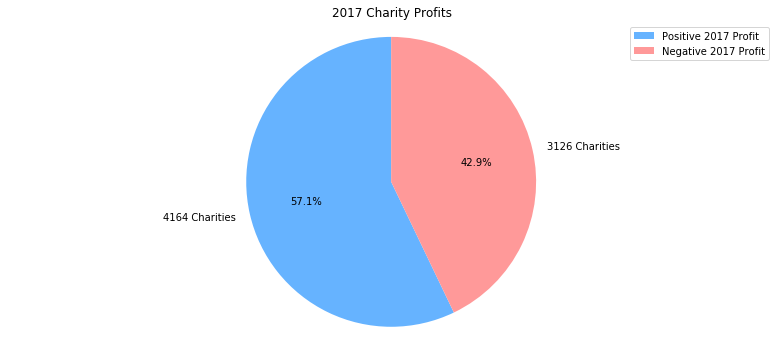

In [11]:
plt.figure(figsize = (11, 5))
labels = [str(df['excess_or_deficit_id'].value_counts()[0]) + ' Charities', 
          str(df['excess_or_deficit_id'].value_counts()[1]) + ' Charities']
plt.pie(df['excess_or_deficit_id'].value_counts(), 
        labels = labels, 
        colors = ['#66b3ff', '#ff9999'],
        autopct = '%1.1f%%', startangle = 90)
plt.title('2017 Charity Profits')
plt.legend(['Positive 2017 Profit', 'Negative 2017 Profit'], loc = 'best')
plt.axis('equal')
plt.tight_layout()

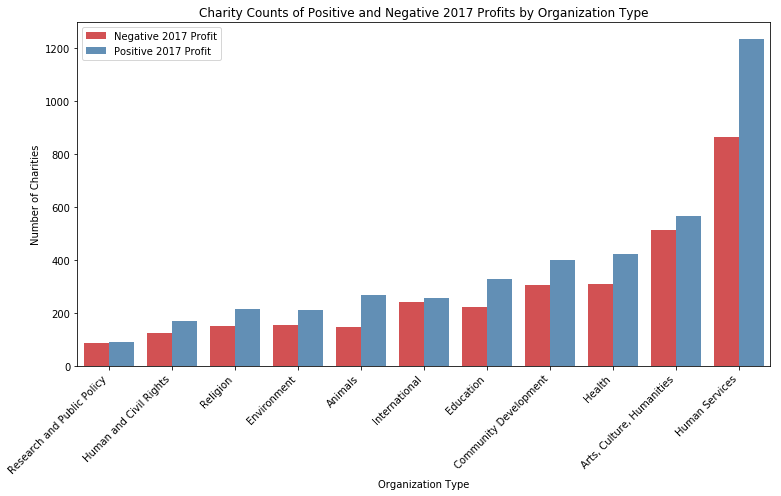

In [12]:
plt.figure(figsize = (11, 7))

ax = sns.countplot(x = 'org_type_id', hue = 'excess_or_deficit_id',
                   data = df, palette = 'Set1', alpha = 0.85,
                   order = reversed(df['org_type_id'].value_counts().index))
ax.set_xlabel('Organization Type')
ax.set_ylabel('Number of Charities')
ax.set_title('Charity Counts of Positive and Negative 2017 Profits by Organization Type')
ax.set_xticklabels(reversed(df['org_type'].value_counts().index),
                   rotation = 45, ha = "right")
plt.legend(['Negative 2017 Profit', 'Positive 2017 Profit'])
plt.tight_layout()

### **Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split

All numerical features including org type dummy variables are included.

In [66]:
feature_names = ['accountability_score', 'financial_score',
                 'overall_score', 'administrative_expenses',
                 'fundraising_expenses', 'net_assets',
                 'other_revenue', 'payments_to_affiliates',
                 'comp_leader_income', 'comp_leader_expense_pct',
                 'Animals', 'Arts, Culture, Humanities',
                 'Community Development', 'Education',
                 'Environment', 'Health', 'Human Services',
                 'Human and Civil Rights', 'International',
                 'Religion']
X = df[feature_names]
y = df['excess_or_deficit_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

### **Decision Tree Classifier**

#### *Will a decision tree allow for an accurate model to predict whether a charity's 2017 profit was positive or negative?*

In [67]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn import metrics

Instantiate DecisionTreeClassifier() and fit our data to a model at a range of max_depths.

In [68]:
scores = []

for m in range(1, 40):
    dtree = DecisionTreeClassifier(max_depth = m)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    scores.append(dtree.score(X_test, y_test))

*At what max_depth does the Test $R^2$ score reach its peak?*

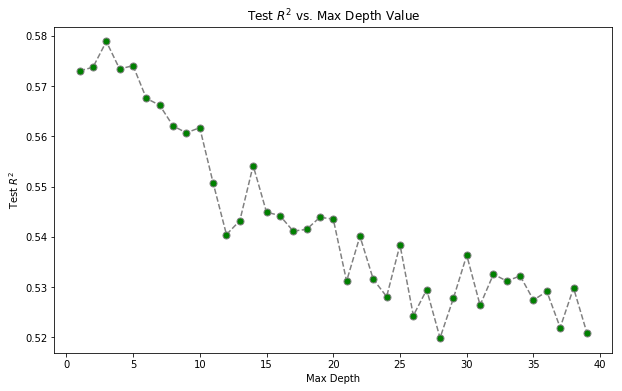

In [17]:
plt.figure(figsize = (10, 6))

plt.plot(range(1, 40), scores, color = 'grey', 
         linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'green', markersize = 7)
plt.title('Test $R^2$ vs. Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Test $R^2$');

Let's instantiate DecisionTreeClassifier(), choosing the max_depth value that produced the highest test $R^2$ score.

In [18]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

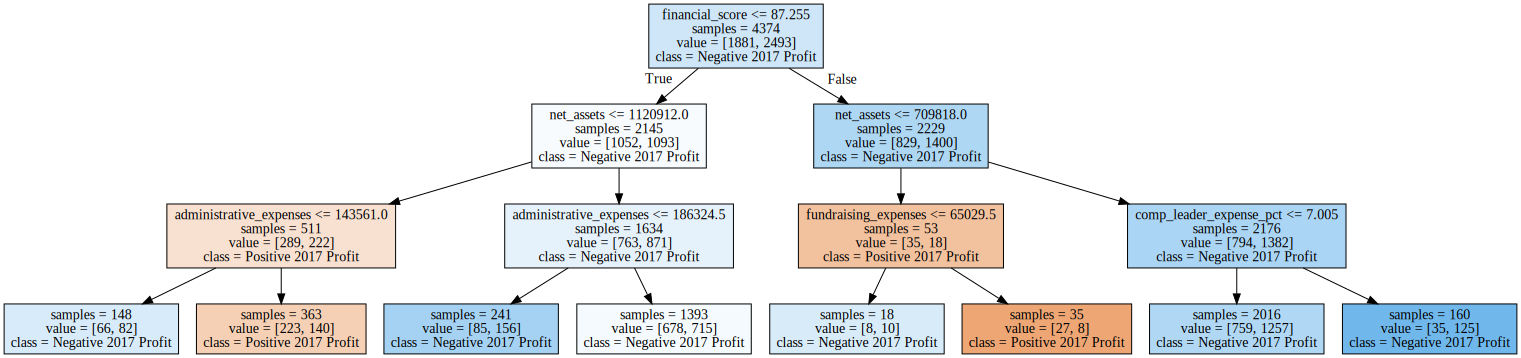

In [19]:
plot_decision_tree(dtree, X.columns, df['excess_or_deficit_string'].unique())

Let's create a new dictionary to see all the decision tree feature importancesin our current model.

In [20]:
dtree_dic = {}
n = 0
for feature_importances in dtree.feature_importances_:
    dtree_dic[X.columns[n]] = dtree.feature_importances_[n]
    n += 1
    
dtree_df = pd.Series(dtree_dic).to_frame()
dtree_df.rename({0: 'feature_importance'}, axis = 'columns', inplace = True)

Use the new dictionary to visualize the feature importances with a barplot.

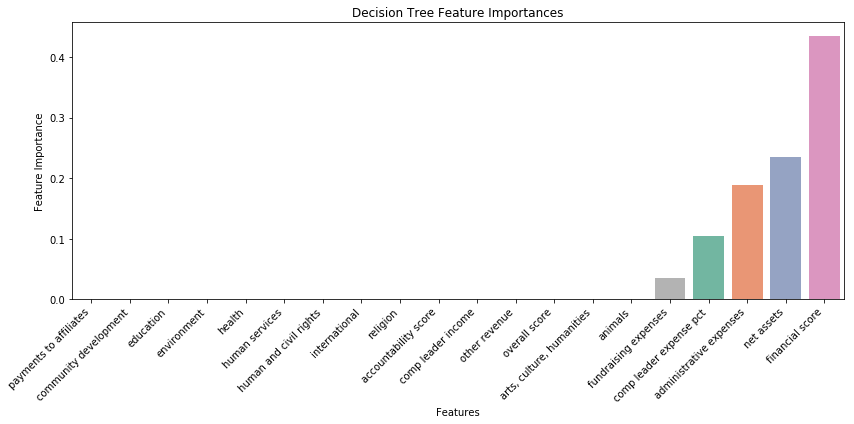

In [21]:
plt.figure(figsize = (12, 6))

ax = sns.barplot(x = dtree_df.index, 
                 y = dtree_df['feature_importance'], 
                 data = dtree_df, palette = 'Set2',
                 order = reversed(dtree_df.sort_values(by = 'feature_importance',
                                                       ascending = False).index))
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance')
ax.set_title('Decision Tree Feature Importances')
ax.set_xticklabels(reversed(
    dtree_df.sort_values(by = 'feature_importance',
                         ascending = False).index.str.lower().str.replace('_', ' ')),
                   rotation = 45, ha = "right")

plt.tight_layout()

In [22]:
print('Train R^2:', dtree.score(X_train, y_train).round(4))
print('Test  R^2:', dtree.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.5933
Test  R^2: 0.5789
MAE:       0.4211
MSE:       0.4211
RMSE:      0.6489


In [23]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.54      0.10      0.16      1245
          1       0.58      0.94      0.72      1671

avg / total       0.56      0.58      0.48      2916

[[ 120 1125]
 [ 103 1568]]


In [24]:
from sklearn.metrics import roc_curve, auc

In [69]:
max_depths = np.linspace(1, 40, 40, endpoint = True)

train_results_0 = []
test_results_0 = []
for max_depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth = max_depth)
    dtree.fit(X_train, y_train)
    train_pred = dtree.predict(X_train).astype(int)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train.astype(int), train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_0.append(roc_auc)
    y_pred = dtree.predict(X_test).astype(int)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.astype(int), y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results_0.append(roc_auc)

In [70]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)

train_results_1 = []
test_results_1 = []
for min_samples_split in min_samples_splits:
    dtree = DecisionTreeClassifier(min_samples_split = min_samples_split)
    dtree.fit(X_train, y_train)
    train_pred = dtree.predict(X_train).astype(int)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train.astype(int), train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_1.append(roc_auc)
    y_pred = dtree.predict(X_test).astype(int)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.astype(int), y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results_1.append(roc_auc)

In [71]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)

train_results_2 = []
test_results_2 = []
for min_samples_leaf in min_samples_leafs:
    dtree = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf)
    dtree.fit(X_train, y_train)
    train_pred = dtree.predict(X_train).astype(int)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train.astype(int), train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_2.append(roc_auc)
    y_pred = dtree.predict(X_test).astype(int)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.astype(int), y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results_2.append(roc_auc)

In [72]:
max_features = list(range(1, X_train.shape[1]))

train_results_3 = []
test_results_3 = []
for max_feature in max_features:
    dtree = DecisionTreeClassifier(max_features = max_feature)
    dtree.fit(X_train, y_train)
    train_pred = dtree.predict(X_train).astype(int)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train.astype(int), train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_3.append(roc_auc)
    y_pred = dtree.predict(X_test).astype(int)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.astype(int), y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results_3.append(roc_auc)

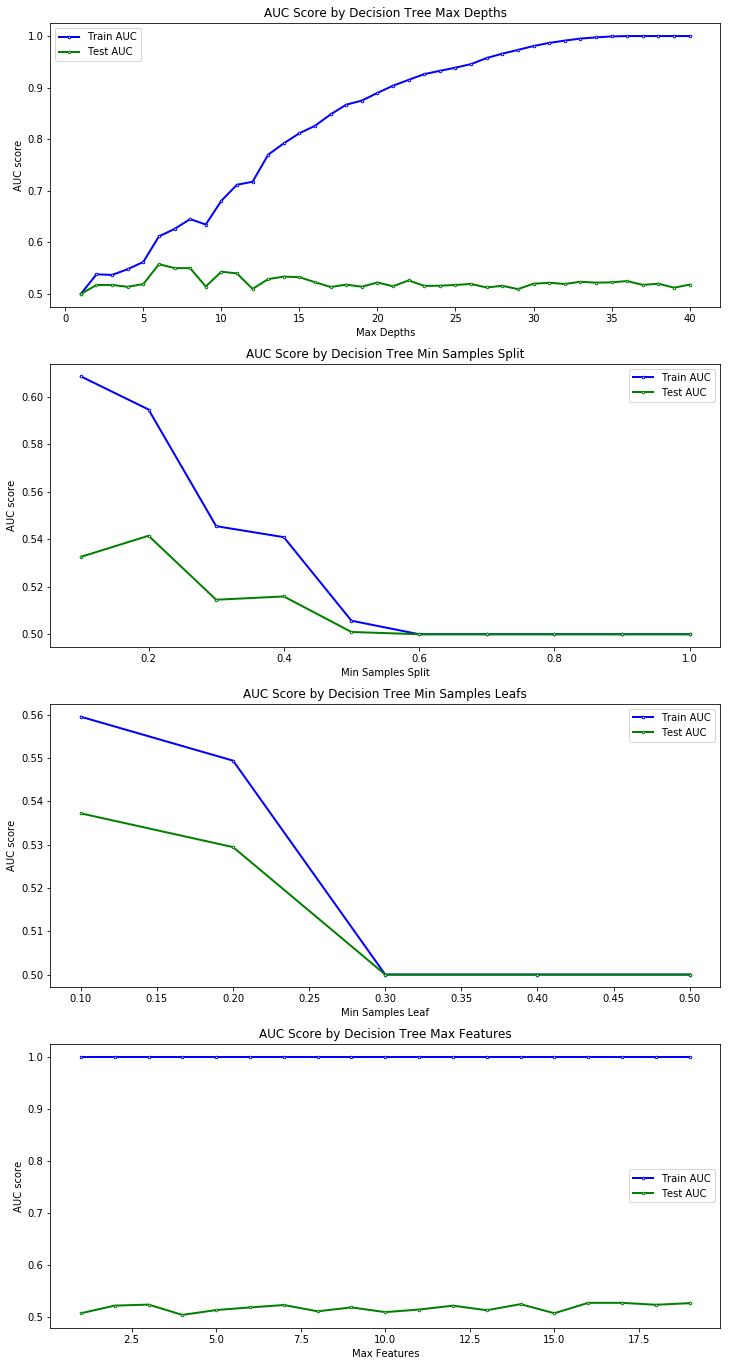

In [122]:
fig, axes = plt.subplots(nrows = 4, ncols = 1,
                         figsize = (12, 24))

axes[0].plot(max_depths, train_results_0, 'b', label = 'Train AUC', \
             lw = 2, marker = '.', markerfacecolor = 'w', markersize = 5)
axes[0].plot(max_depths, test_results_0, 'g', label = 'Test AUC', \
             lw = 2, marker = '.', markerfacecolor = 'w', markersize = 5)
axes[0].set_title('AUC Score by Decision Tree Max Depths')  
axes[0].legend(['Train AUC', 'Test AUC'], loc = 'best')
axes[0].set_ylabel('AUC score')
axes[0].set_xlabel('Max Depths')

axes[1].plot(min_samples_splits, train_results_1, 'b', label = 'Train AUC', \
             lw = 2, marker = '.', markerfacecolor = 'w', markersize = 5)
axes[1].plot(min_samples_splits, test_results_1, 'g', label = 'Test AUC', \
             lw = 2, marker = '.', markerfacecolor = 'w', markersize = 5)
axes[1].set_title('AUC Score by Decision Tree Min Samples Split')
axes[1].legend(['Train AUC', 'Test AUC'], loc = 'best')
axes[1].set_ylabel('AUC score')
axes[1].set_xlabel('Min Samples Split')

axes[2].plot(min_samples_leafs, train_results_2, 'b', label = 'Train AUC', \
             lw = 2, marker = '.', markerfacecolor = 'w', markersize = 5)
axes[2].plot(min_samples_leafs, test_results_2, 'g', label = 'Test AUC', \
             lw = 2, marker = '.', markerfacecolor = 'w', markersize = 5)
axes[2].set_title('AUC Score by Decision Tree Min Samples Leafs')
axes[2].legend(['Train AUC', 'Test AUC'], loc = 'best')
axes[2].set_ylabel('AUC score')
axes[2].set_xlabel('Min Samples Leaf');

axes[3].plot(max_features, train_results_3, 'b', label = 'Train AUC', \
             lw = 2, marker = '.', markerfacecolor = 'w', markersize = 5)
axes[3].plot(max_features, test_results_3, 'g', label = 'Test AUC', \
             lw = 2, marker = '.', markerfacecolor = 'w', markersize = 5)
axes[3].set_title('AUC Score by Decision Tree Max Features')
axes[3].legend(['Train AUC', 'Test AUC'], loc = 'best')
axes[3].set_ylabel('AUC score')
axes[3].set_xlabel('Max Features');

### **Random Forest Classifier**

#### *Will a random forest classifier allow for an accurate model to predict whether a charity's 2017 profit was positive or negative?*

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Instantiate RandomForestClassifier() using the optimal max_depth value found above.

In [34]:
rfc = RandomForestClassifier(n_estimators = 600, max_depth = 3)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [35]:
print('Train R^2:', rfc.score(X_train, y_train).round(4))
print('Test  R^2:', rfc.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.5967
Test  R^2: 0.5748
MAE:       0.4252
MSE:       0.4252
RMSE:      0.6521


In [37]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.52      0.07      0.12      1245
          1       0.58      0.95      0.72      1671

avg / total       0.55      0.57      0.46      2916

[[  84 1161]
 [  79 1592]]


In [38]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 4, 5],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 4, 8],
    'min_samples_split': [2, 8, 12],
    'n_estimators': [300]
}

In [39]:
rfc = RandomForestClassifier()
grid = GridSearchCV(estimator = rfc, cv = 3,
                    param_grid = param_grid, refit = True)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)

In [40]:
print(grid.best_estimator_)
print(grid.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'bootstrap': True, 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 300}


*What are our new metrics scores with these optimized parameters?*

In [41]:
print('Train R^2:', grid.score(X_train, y_train).round(4))
print('Test  R^2:', grid.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, grid_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, grid_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)).round(4))

Train R^2: 0.6303
Test  R^2: 0.5799
MAE:       0.4201
MSE:       0.4201
RMSE:      0.6481


In [42]:
print(metrics.classification_report(y_test, grid_pred))
print(metrics.confusion_matrix(y_test, grid_pred))

             precision    recall  f1-score   support

          0       0.53      0.14      0.22      1245
          1       0.59      0.91      0.71      1671

avg / total       0.56      0.58      0.50      2916

[[ 173 1072]
 [ 153 1518]]


## **Predicting organization type for US charities**

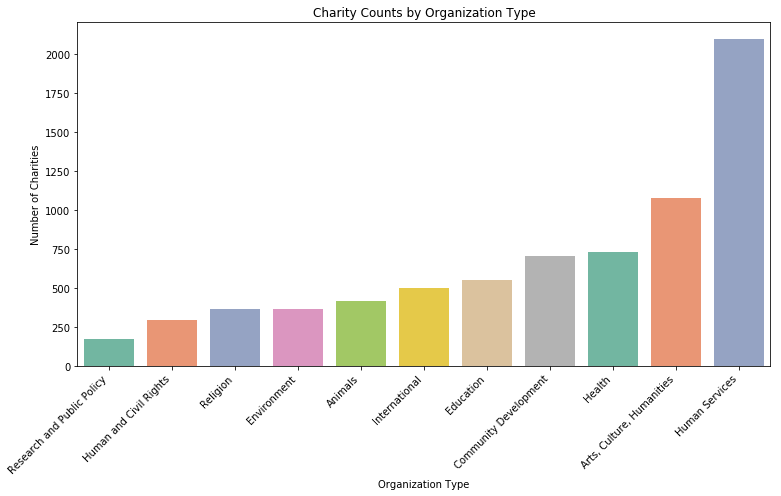

In [43]:
plt.figure(figsize = (11, 7))

ax = sns.countplot(x = 'org_type_id',
                   data = df, palette = 'Set2',
                   order = reversed(df['org_type_id'].value_counts().index))
ax.set_title('Charity Counts by Organization Type')
ax.set_xlabel('Organization Type')
ax.set_ylabel('Number of Charities')
ax.set_xticklabels(reversed(df['org_type'].value_counts().index),
                   rotation = 45, ha = "right")

plt.tight_layout()

### **Train Test Split**

All numerical features except for org type dummy variables are included.

In [44]:
feature_names = ['accountability_score', 'financial_score',
                 'overall_score', 'administrative_expenses',
                 'fundraising_expenses', 'net_assets',
                 'other_revenue', 'payments_to_affiliates',
                 'comp_leader_income', 'comp_leader_expense_pct',
                 'excess_or_deficit_for_year']
X = df[feature_names]
y = df['org_type_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

### **Decision Tree Classifier**

#### *Will a decision tree allow for an accurate model to predict a charity's organization type?*

Instantiate DecisionTreeClassifier() and fit our data to a model at a range of max_depths.

In [45]:
scores = []

for m in range(1, 40):
    dtree = DecisionTreeClassifier(max_depth = m)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    scores.append(dtree.score(X_test, y_test))

*At what max_depth does the Test $R^2$ score reach its peak?*

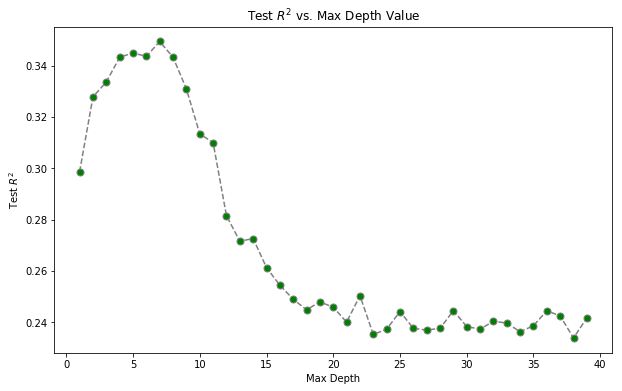

In [46]:
plt.figure(figsize = (10, 6))

plt.plot(range(1, 40), scores, color = 'grey', 
         linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'green', markersize = 7)
plt.title('Test $R^2$ vs. Max Depth Value')
plt.xlabel('Max Depth')
plt.ylabel('Test $R^2$');

Let's instantiate DecisionTreeClassifier(), choosing the max_depth value that produced the highest test $R^2$ score.

In [47]:
dtree = DecisionTreeClassifier(max_depth = 7)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

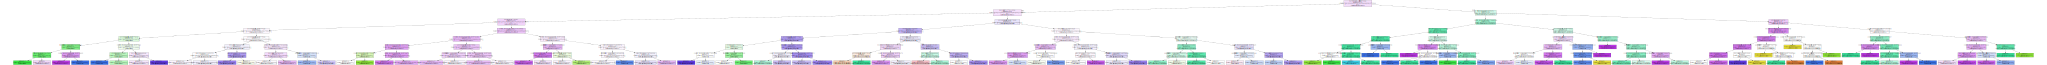

In [48]:
plot_decision_tree(dtree, X.columns, df['org_type'].unique())

Let's create a new dictionary to see all the decision tree feature importancesin our current model.

In [49]:
dtree_dic = {}
n = 0
for feature_importances in dtree.feature_importances_:
    dtree_dic[X.columns[n]] = dtree.feature_importances_[n]
    n += 1
    
dtree_df = pd.Series(dtree_dic).to_frame()
dtree_df.rename({0: 'feature_importance'}, axis = 'columns', inplace = True)

Use the new dictionary to visualize the feature importances with a barplot.

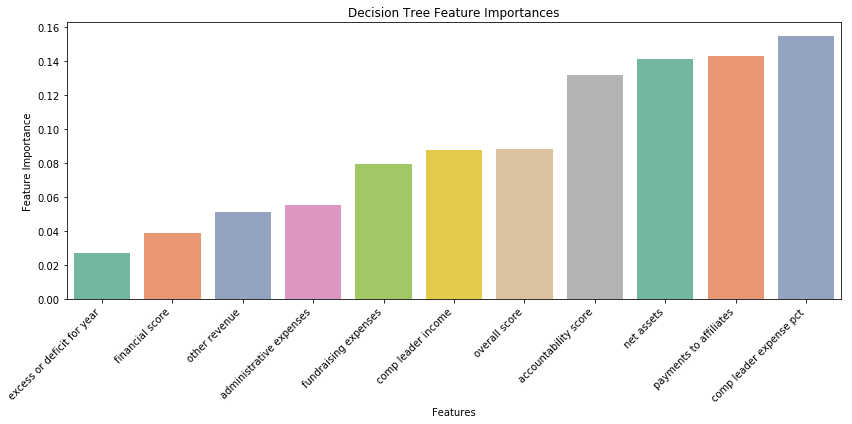

In [50]:
plt.figure(figsize = (12, 6))

ax = sns.barplot(x = dtree_df.index, 
                 y = dtree_df['feature_importance'], 
                 data = dtree_df, palette = 'Set2',
                 order = reversed(dtree_df.sort_values(by = 'feature_importance',
                                                       ascending = False).index))
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance')
ax.set_title('Decision Tree Feature Importances')
ax.set_xticklabels(reversed(
    dtree_df.sort_values(by = 'feature_importance',
                         ascending = False).index.str.lower().str.replace('_', ' ')),
                   rotation = 45, ha = "right")

plt.tight_layout()

In [51]:
print('Train R^2:', dtree.score(X_train, y_train).round(4))
print('Test  R^2:', dtree.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.4234
Test  R^2: 0.3495
MAE:       2.275
MSE:       11.3292
RMSE:      3.3659


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       112
        1.0       0.04      0.00      0.01       225
        2.0       0.24      0.06      0.10       203
        3.0       0.38      0.14      0.20       133
        4.0       0.64      0.35      0.46       288
        5.0       0.00      0.00      0.00       137
        6.0       0.24      0.07      0.11       289
        7.0       0.32      0.47      0.38       443
        8.0       0.36      0.78      0.49       826
        9.0       0.12      0.06      0.08       175
       10.0       0.00      0.00      0.00        85

avg / total       0.28      0.35      0.27      2916



/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


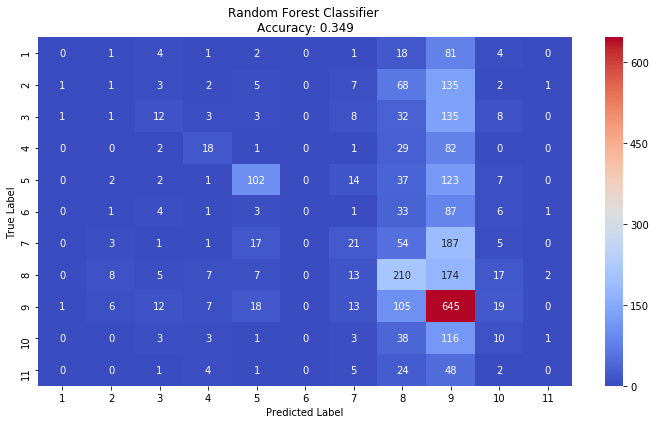

In [52]:
print(metrics.classification_report(y_test, y_pred))

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = [i for i in range(1, 12)],
                  columns = [i for i in range(1, 12)])

plt.figure(figsize = (10, 6))
sns.heatmap(df_cm, annot = True, fmt = 'g', cmap = 'coolwarm')
plt.title('Random Forest Classifier \nAccuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label');
plt.tight_layout()

### **Random Forest Classifier**

#### *Will a random forest classifier allow for an accurate model to predict a charity's organization type?*

In [53]:
from sklearn.ensemble import RandomForestClassifier

Instantiate RandomForestClassifier() using the optimal max_depth value found above.

In [54]:
rfc = RandomForestClassifier(n_estimators = 300, max_depth = 7)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [55]:
print('Train R^2:', rfc.score(X_train, y_train).round(4))
print('Test  R^2:', rfc.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.4556
Test  R^2: 0.3817
MAE:       2.1927
MSE:       11.07
RMSE:      3.3272


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       112
        1.0       0.00      0.00      0.00       225
        2.0       0.60      0.01      0.03       203
        3.0       0.39      0.19      0.25       133
        4.0       0.70      0.47      0.56       288
        5.0       0.00      0.00      0.00       137
        6.0       0.52      0.06      0.11       289
        7.0       0.41      0.49      0.45       443
        8.0       0.34      0.87      0.49       826
        9.0       0.00      0.00      0.00       175
       10.0       0.00      0.00      0.00        85

avg / total       0.34      0.38      0.29      2916



/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


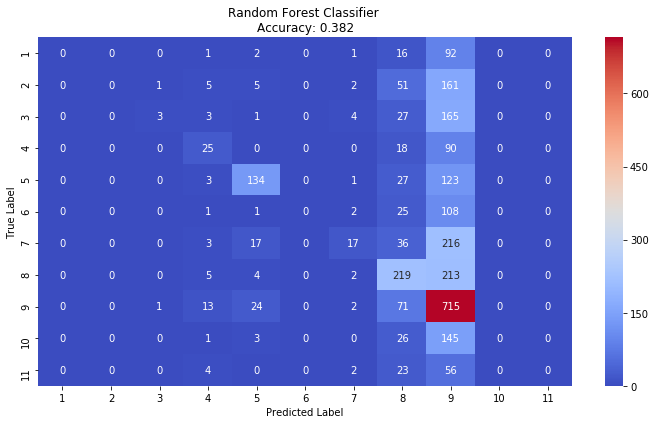

In [56]:
print(metrics.classification_report(y_test, y_pred))

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = [i for i in range(1, 12)],
                  columns = [i for i in range(1, 12)])

plt.figure(figsize = (10, 6))
sns.heatmap(df_cm, annot = True, fmt = 'g', cmap = 'coolwarm')
plt.title('Random Forest Classifier \nAccuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label');
plt.tight_layout()

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [1, 4, 8],
    'min_samples_split': [2, 8, 12],
    'n_estimators': [300]
}

In [58]:
rfc = RandomForestClassifier()
grid = GridSearchCV(estimator = rfc, cv = 3,
                    param_grid = param_grid, refit = True)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)

In [59]:
print(grid.best_estimator_)
print(grid.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'bootstrap': True, 'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


*What are our new metrics scores with these optimized parameters?*

In [60]:
print('Train R^2:', grid.score(X_train, y_train).round(4))
print('Test  R^2:', grid.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, grid_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, grid_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)).round(4))

Train R^2: 0.4492
Test  R^2: 0.3831
MAE:       2.1797
MSE:       10.9348
RMSE:      3.3068


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       112
        1.0       0.00      0.00      0.00       225
        2.0       0.62      0.02      0.05       203
        3.0       0.36      0.20      0.25       133
        4.0       0.72      0.46      0.56       288
        5.0       0.00      0.00      0.00       137
        6.0       0.40      0.09      0.14       289
        7.0       0.40      0.50      0.44       443
        8.0       0.35      0.86      0.50       826
        9.0       0.00      0.00      0.00       175
       10.0       0.00      0.00      0.00        85

avg / total       0.33      0.38      0.29      2916



/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


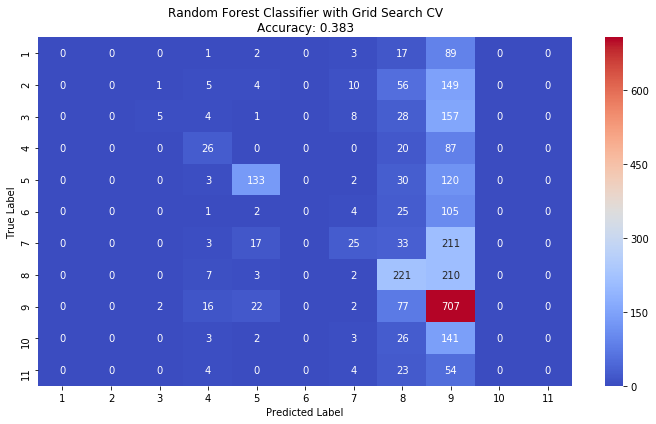

In [61]:
print(metrics.classification_report(y_test, grid_pred))

df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, grid_pred), index = [i for i in range(1, 12)],
                  columns = [i for i in range(1, 12)])

plt.figure(figsize = (10, 6))
sns.heatmap(df_cm, annot = True, fmt = 'g', cmap = 'coolwarm')
plt.title('Random Forest Classifier with Grid Search CV\nAccuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, grid_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label');
plt.tight_layout()